<a href="https://colab.research.google.com/github/SSR-ds/Time-Series-with-Python/blob/main/Holiday_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
%matplotlib inline

import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from datetime import datetime
import seaborn as sns   

In [2]:
from google.colab import files
uploaded = files.upload()

Saving amazon_revenue_profit.csv to amazon_revenue_profit.csv


In [5]:
df1 = pd.read_csv('amazon_revenue_profit.csv')

In [6]:
df1.head()

,Quarter,Revenue,Net Income
0,3/31/2020,75452,2535
1,12/31/2019,87437,3268
2,9/30/2019,69981,2134
3,6/30/2019,63404,2625
4,3/31/2019,59700,3561


In [7]:
df1['Quarter'] = pd.to_datetime(df1.Quarter)
df1.dtypes

Quarter       datetime64[ns]
Revenue                int64
Net Income             int64
dtype: object

In [8]:
from fbprophet import Prophet

In [9]:
df2 = df1[['Quarter','Revenue']].rename({'Quarter':'ds','Revenue':'y'}, axis='columns')

In [11]:
df2

,ds,y
0,2020-03-31,75452
1,2019-12-31,87437
2,2019-09-30,69981
3,2019-06-30,63404
4,2019-03-31,59700
5,2018-12-31,72383
6,2018-09-30,56576
7,2018-06-30,52886
8,2018-03-31,51042
9,2017-12-31,60453


In [12]:
#splitting the data

train =  df2[(df2['ds'] >= '2005-03-31') & (df2['ds'] <= '2019-03-31')]
test =  df2[(df2['ds'] > '2019-03-31')]

In [13]:
train.shape

(57, 2)

In [14]:
test.shape

(4, 2)

In [16]:
model = Prophet(interval_width=0.90)

In [17]:
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
model.params

{'beta': array([[ 0.79237823, -2.90359076, -0.07247815, -1.28043804, -0.26508794,
         -1.4532344 ,  0.25204303, -2.58235462,  0.53054872, -1.4252768 ,
         -0.17081742, -0.34588344,  0.32618812,  3.09202459, -0.779768  ,
          3.694574  , -1.21193405,  2.69947842, -0.14612738,  1.62350616]]),
 'delta': array([[-2.37303262e-10, -9.47985957e-10,  1.42903888e-09,
          1.46813570e-06,  2.11631125e-05,  3.33848456e-04,
          9.40664959e-05,  1.14536316e-04,  6.79167592e-04,
          1.52879907e-04,  1.99195881e-03,  3.94627870e-01,
          4.94216024e-04,  3.48811395e-04,  2.06261200e-04,
          5.38296501e-04,  2.11109297e-04,  5.68393422e-04,
          1.11156966e-05,  3.92333113e-04,  8.48404173e-05,
          6.75550753e-04,  3.42769150e-01,  9.03918726e-01,
          4.26160219e-02]]),
 'k': array([[0.26395508]]),
 'm': array([[-1.1808728]]),
 'sigma_obs': array([[0.02884929]]),
 'trend': array([[-1.1808728 , -1.17617499, -1.17142556, -1.16667612, -1.1620299

In [22]:
future = model.make_future_dataframe(periods=4,freq='Q')

In [24]:
future.tail()

,ds
56,2019-03-31
57,2019-06-30
58,2019-09-30
59,2019-12-31
60,2020-03-31


In [31]:
forecasting = model.predict(future)

new = forecasting[['ds','yhat','yhat_lower','yhat_upper']]

In [33]:
new.tail()

,ds,yhat,yhat_lower,yhat_upper
56,2019-03-31,61089.496722,57629.332765,64597.844583
57,2019-06-30,63195.117248,59832.224721,66561.562324
58,2019-09-30,66153.769201,62658.567322,69738.111341
59,2019-12-31,74249.538212,71042.219182,77697.672401
60,2020-03-31,70663.367647,67258.536834,73975.105881


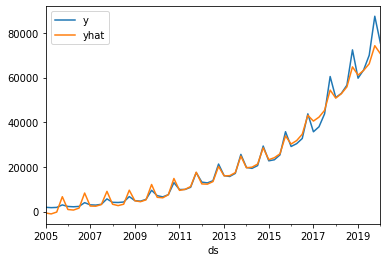

In [34]:
pd.concat([df2.set_index('ds')['y'],new.set_index('ds')['yhat']],axis=1).plot()

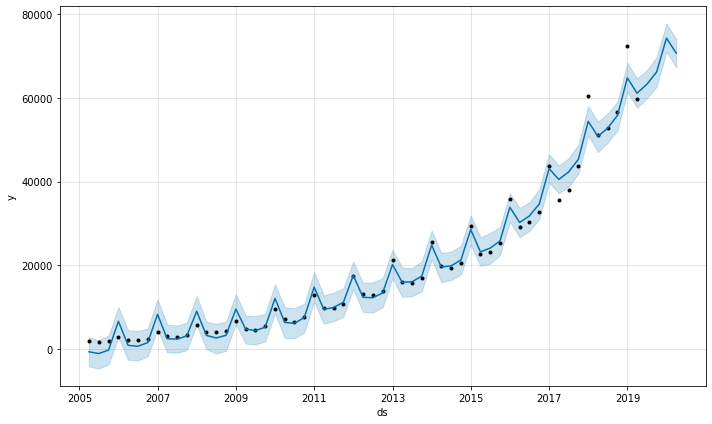

In [35]:
figure = model.plot(forecasting)

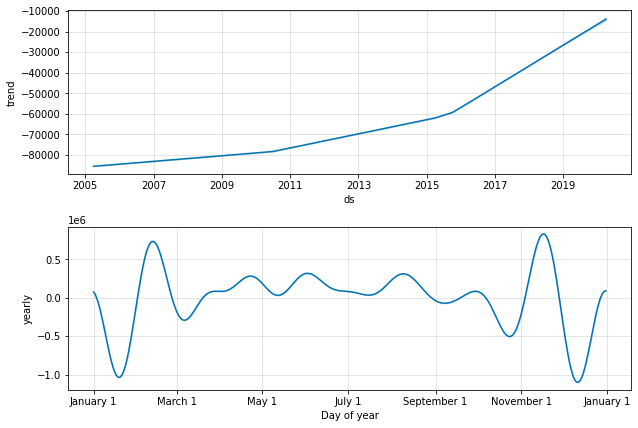

In [36]:
figure2 = model.plot_components(forecasting)

In [65]:
holidays = pd.DataFrame({'holiday':'Year end sale',
                        'ds': pd.to_datetime(['2019-12-31','2018-12-31','2017-12-31','2016-12-31','2015-12-31','2014-12-31','2013-12-31','2012-12-31','2011-12-31',
                        '2010-12-31','2009-12-31','2008-12-31','2007-12-31','2006-12-31','2005-12-31']),
                        'lower_window':0,
                        'upper_window':2
                        })

In [66]:
holidays.head()

,holiday,ds,lower_window,upper_window
0,Year end sale,2019-12-31,0,2
1,Year end sale,2018-12-31,0,2
2,Year end sale,2017-12-31,0,2
3,Year end sale,2016-12-31,0,2
4,Year end sale,2015-12-31,0,2


In [67]:
model1 = Prophet(interval_width=0.90, seasonality_mode='multiplicative',holidays=holidays)

In [68]:
model1.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [69]:
model1.params

{'beta': array([[ 1.04663066e-01,  1.55208109e-01, -1.60564555e-01,
          1.98148848e-01, -4.04189925e-02,  1.11022797e+00,
         -5.93215553e+00,  6.70763102e+00,  1.72080184e-01,
         -3.90441232e-01, -4.53213189e-01,  1.20468577e-01,
         -1.20617177e-01,  2.49021871e+00, -1.15762508e+01,
          4.65769867e+00,  1.11890175e-01, -5.76376020e-01,
         -6.63446819e-01, -1.35228377e-02,  2.07937566e+00,
         -1.43768778e-13, -1.43768778e-13]]),
 'delta': array([[-5.86743546e-10, -1.76754412e-11,  3.84046032e-03,
          2.66430793e-05,  4.49283034e-03, -1.47706054e-09,
          6.26679401e-10,  8.28932528e-10,  6.74677057e-03,
          5.27396970e-04, -1.51867994e-09,  1.62624413e-02,
         -1.75052657e-09,  8.29479750e-03,  4.27453239e-04,
         -2.50241665e-04, -8.67524034e-03, -2.27891449e-08,
          2.78879921e-09, -2.62955080e-03,  9.59020181e-04,
          3.77107255e-09,  4.57254736e-04,  8.90308286e-02,
          6.63948403e-04]]),
 'k': ar

In [70]:
future1 = model1.make_future_dataframe(periods=4,freq='Q')

In [71]:
future1.head()

,ds
0,2005-03-31
1,2005-06-30
2,2005-09-30
3,2005-12-31
4,2006-03-31


In [77]:
forecasting1 = model1.predict(future)

new1= forecasting1[['ds','yhat','yhat_lower','yhat_upper']]

In [78]:
new1.tail()

,ds,yhat,yhat_lower,yhat_upper
56,2019-03-31,60099.770257,58572.275123,61621.462877
57,2019-06-30,62625.534264,61126.968092,64141.175638
58,2019-09-30,67792.094303,66174.359698,69362.962608
59,2019-12-31,89322.256155,87583.987964,90884.310477
60,2020-03-31,66843.173658,65128.931086,68579.037386


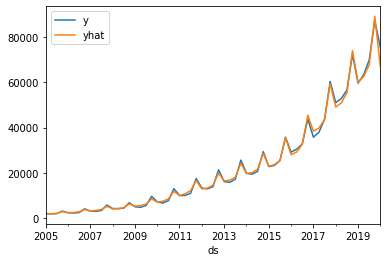

In [79]:
pd.concat([df2.set_index('ds')['y'],new1.set_index('ds')['yhat']],axis=1).plot()

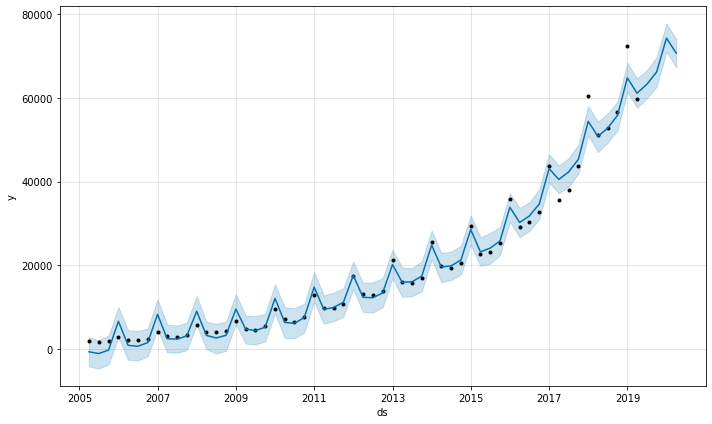

In [80]:
figure1 = model1.plot(forecasting)

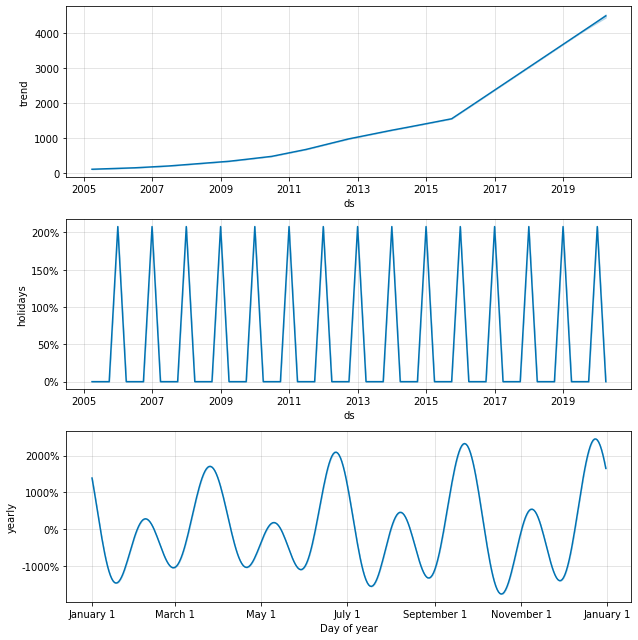

In [81]:
figure3 = model1.plot_components(forecasting1)